# Turning Parametros e Validação Cruzada

In [ ]:
# Modelos de aprendizagem

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_treinamento, Y_treinamento, X_teste, Y_teste = pickle.load(f)

In [ ]:
X_treinamento.shape, Y_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_teste.shape, Y_teste.shape

((500, 3), (500,))

In [ ]:
import numpy as np

X_credit = np.concatenate((X_treinamento, X_teste), axis=0)
X_credit.shape

(2000, 3)

In [ ]:
Y_credit = np.concatenate((Y_treinamento, Y_teste), axis=0)
Y_credit.shape

(2000,)

# Arvore de Decisão

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}

In [ ]:
grid_Search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_Search.fit(X_credit, Y_credit)
melhor_parametros = grid_Search.best_params_
melhor_resultados = grid_Search.best_score_
print(melhor_parametros)
print(melhor_resultados)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


In [ ]:
resultado_arvore = []

for x in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=x)
  # Criterios gerados pelo GridSearch CV vão para o modelo
  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, Y_credit, cv = kfold)
  # print(scores.mean())
  resultado_arvore.append(scores.mean())
print(resultado_arvore)

[0.9864999999999998, 0.985, 0.9905000000000002, 0.9875, 0.9884999999999999, 0.9890000000000001, 0.9884999999999999, 0.9875, 0.9870000000000001, 0.9869999999999999, 0.9860000000000001, 0.9899999999999999, 0.9889999999999999, 0.9864999999999998, 0.985, 0.9854999999999998, 0.9855, 0.9904999999999999, 0.9875, 0.9869999999999999, 0.983, 0.9865, 0.9889999999999999, 0.9875, 0.9880000000000001, 0.9884999999999999, 0.9875, 0.986, 0.9869999999999999, 0.9884999999999999]


# Ramdom Forest

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}

In [ ]:
grid_Search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_Search.fit(X_credit, Y_credit)
melhor_parametros = grid_Search.best_params_
melhor_resultados = grid_Search.best_score_
print(melhor_parametros)
print(melhor_resultados)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9890000000000001


In [ ]:
resultado_RandomForest = []

for x in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=x)
  # Criterios gerados pelo GridSearch CV vão para o modelo
  random_forest = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
  scores = cross_val_score(random_forest, X_credit, Y_credit, cv = kfold)
  # print(scores.mean())
  resultado_RandomForest.append(scores.mean())
print(resultado_RandomForest)

[0.9855, 0.9880000000000001, 0.99, 0.9854999999999998, 0.9879999999999999, 0.9864999999999998, 0.9870000000000001, 0.9864999999999998, 0.9880000000000001, 0.9894999999999999, 0.985, 0.9865, 0.9869999999999999, 0.9884999999999998, 0.9865, 0.9865, 0.9845, 0.9884999999999999, 0.9889999999999999, 0.9875, 0.9874999999999998, 0.9879999999999999, 0.986, 0.9884999999999998, 0.9875, 0.9884999999999999, 0.986, 0.9865, 0.9864999999999998, 0.9865]


# KNN

In [ ]:
parametros = {'n_neighbors': [3,5,10,20],
              'p': [1,2]}

In [ ]:
grid_Search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_Search.fit(X_credit, Y_credit)
melhor_parametros = grid_Search.best_params_
melhor_resultados = grid_Search.best_score_
print(melhor_parametros)
print(melhor_resultados)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


In [ ]:
resultado_KNN = []

for x in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=x)
  # Criterios gerados pelo GridSearch CV vão para o modelo
  knn = KNeighborsClassifier(n_neighbors= 20, p= 1)
  scores = cross_val_score(knn, X_credit, Y_credit, cv = kfold)
  # print(scores.mean())
  resultado_KNN.append(scores.mean())
print(resultado_KNN)

[0.9800000000000001, 0.9800000000000001, 0.9799999999999999, 0.9799999999999999, 0.9809999999999999, 0.9785, 0.9799999999999999, 0.9804999999999999, 0.9809999999999999, 0.9809999999999999, 0.978, 0.9804999999999999, 0.9809999999999999, 0.9799999999999999, 0.9795, 0.9795, 0.9804999999999999, 0.983, 0.9800000000000001, 0.9804999999999999, 0.9799999999999999, 0.9810000000000001, 0.9810000000000001, 0.9800000000000001, 0.9835, 0.9814999999999999, 0.9795, 0.9795, 0.9775, 0.978]


# Regressão Lógica

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_Search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_Search.fit(X_credit, Y_credit)
melhor_parametros = grid_Search.best_params_
melhor_resultados = grid_Search.best_score_
print(melhor_parametros)
print(melhor_resultados)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


In [ ]:
resultado_RegrecaoLogica = []

for x in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=x)
  # Criterios gerados pelo GridSearch CV vão para o modelo
  rl = LogisticRegression(C= 1.0, solver= 'lbfgs', tol= 0.0001)
  scores = cross_val_score(rl, X_credit, Y_credit, cv = kfold)
  # print(scores.mean())
  resultado_RegrecaoLogica.append(scores.mean())
print(resultado_RegrecaoLogica)

[0.9475, 0.9465, 0.9470000000000001, 0.946, 0.9465, 0.9465, 0.9469999999999998, 0.9480000000000001, 0.9465, 0.9465, 0.9475, 0.9479999999999998, 0.9475, 0.9475, 0.9484999999999999, 0.9475, 0.946, 0.9470000000000001, 0.9465, 0.9464999999999998, 0.9465, 0.9469999999999998, 0.9455, 0.9465, 0.9470000000000001, 0.9469999999999998, 0.9475, 0.9465, 0.9480000000000001, 0.9465]


# SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C':[1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_Search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_Search.fit(X_credit, Y_credit)
melhor_parametros = grid_Search.best_params_
melhor_resultados = grid_Search.best_score_
print(melhor_parametros)
print(melhor_resultados)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


In [ ]:
resultado_SVM = []

for x in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=x)
  # Criterios gerados pelo GridSearch CV vão para o modelo
  svc = SVC(C= 1.5, kernel= 'rbf', tol= 0.001)
  scores = cross_val_score(svc, X_credit, Y_credit, cv = kfold)
  # print(scores.mean())
  resultado_SVM.append(scores.mean())
print(resultado_SVM)

[0.9835, 0.984, 0.9834999999999999, 0.9844999999999999, 0.9855, 0.9835, 0.9839999999999998, 0.9845, 0.982, 0.9829999999999999, 0.9824999999999999, 0.9825000000000002, 0.9844999999999999, 0.984, 0.9834999999999999, 0.9845, 0.984, 0.9844999999999999, 0.985, 0.9839999999999998, 0.9835, 0.985, 0.9844999999999999, 0.9870000000000001, 0.9839999999999998, 0.982, 0.9825000000000002, 0.9850000000000001, 0.983, 0.986]


# Rede Neural

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_Search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_Search.fit(X_credit, Y_credit)
melhor_parametros = grid_Search.best_params_
melhor_resultados = grid_Search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
print(melhor_parametros)
print(melhor_resultados)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9964999999999999


In [ ]:
resultado_RedeNeural = []

for x in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=x)
  # Criterios gerados pelo GridSearch CV vão para o modelo
  rn = MLPClassifier(activation= 'relu', batch_size= 56, solver= 'adam')
  scores = cross_val_score(rn, X_credit, Y_credit, cv = kfold)
  # print(scores.mean())
  resultado_RedeNeural.append(scores.mean())
print(resultado_RedeNeural)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

[0.9969999999999999, 0.9974999999999999, 0.9969999999999999, 0.9969999999999999, 0.998, 0.9974999999999999, 0.9964999999999999, 0.9970000000000001, 0.9969999999999999, 0.9970000000000001, 0.9964999999999999, 0.9959999999999999, 0.9969999999999999, 0.9974999999999999, 0.9970000000000001, 0.998, 0.9974999999999999, 0.9970000000000001, 0.9970000000000001, 0.9964999999999999, 0.998, 0.9974999999999999, 0.9979999999999999, 0.9974999999999999, 0.9974999999999999, 0.9979999999999999, 0.9970000000000001, 0.9975000000000002, 0.9964999999999999, 0.9964999999999999]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Resultados

In [ ]:
import pandas as pd
resultados = pd.DataFrame({'arvore': resultado_arvore, 'Random Forest': resultado_RandomForest, 'KNN': resultado_KNN, 'Logistica': resultado_RegrecaoLogica, 'SVM': resultado_SVM, 'RedeNeural': resultado_RedeNeural})

resultados

,arvore,Random Forest,KNN,Logistica,SVM,RedeNeural
0,0.9865,0.9855,0.9800,0.9475,0.9835,0.9970
1,0.9850,0.9880,0.9800,0.9465,0.9840,0.9975
2,0.9905,0.9900,0.9800,0.9470,0.9835,0.9970
3,0.9875,0.9855,0.9800,0.9460,0.9845,0.9970
4,0.9885,0.9880,0.9810,0.9465,0.9855,0.9980
5,0.9890,0.9865,0.9785,0.9465,0.9835,0.9975
6,0.9885,0.9870,0.9800,0.9470,0.9840,0.9965
7,0.9875,0.9865,0.9805,0.9480,0.9845,0.9970
8,0.9870,0.9880,0.9810,0.9465,0.9820,0.9970
9,0.9870,0.9895,0.9810,0.9465,0.9830,0.9970


# Teste de Hipotese

In [ ]:
import seaborn as sns

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultado_arvore), shapiro(resultado_RandomForest), shapiro(resultado_KNN), shapiro(resultado_RegrecaoLogica), shapiro(resultado_SVM), shapiro(resultado_RedeNeural)

(ShapiroResult(statistic=0.976428210735321, pvalue=0.7247399091720581),
 ShapiroResult(statistic=0.9740864038467407, pvalue=0.6558381915092468),
 ShapiroResult(statistic=0.9244037866592407, pvalue=0.0349433459341526),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9637297987937927, pvalue=0.38434284925460815),
 ShapiroResult(statistic=0.9121203422546387, pvalue=0.016836613416671753))

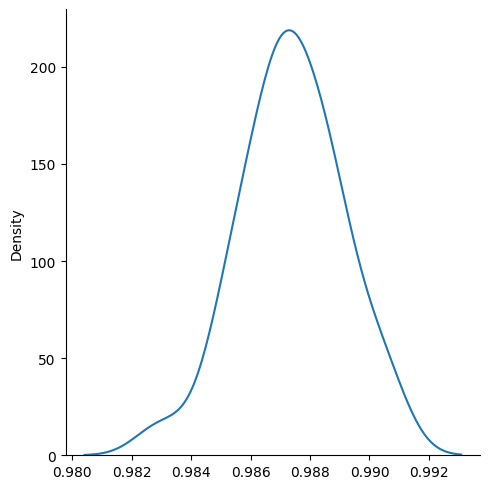

In [ ]:
sns.displot(resultado_arvore, kind="kde")

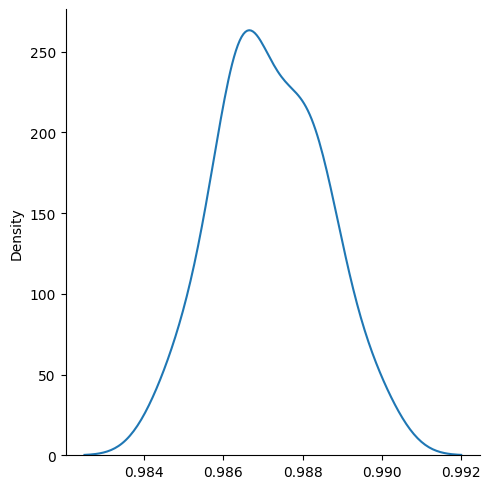

In [ ]:
sns.displot(resultado_RandomForest, kind="kde")

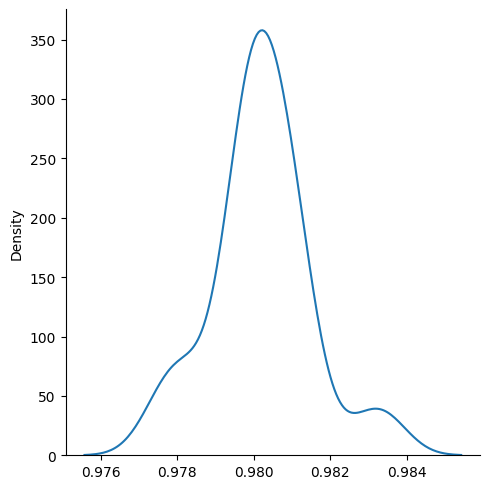

In [ ]:
sns.displot(resultado_KNN, kind="kde")

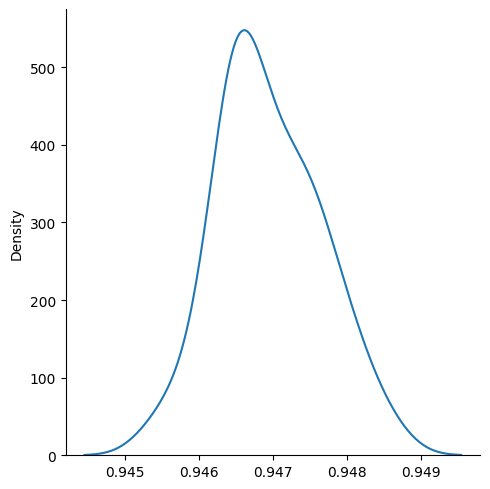

In [ ]:
sns.displot(resultado_RegrecaoLogica, kind="kde")

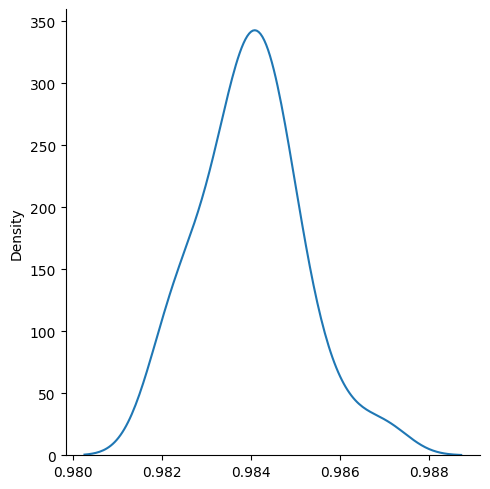

In [ ]:
sns.displot(resultado_SVM, kind="kde")

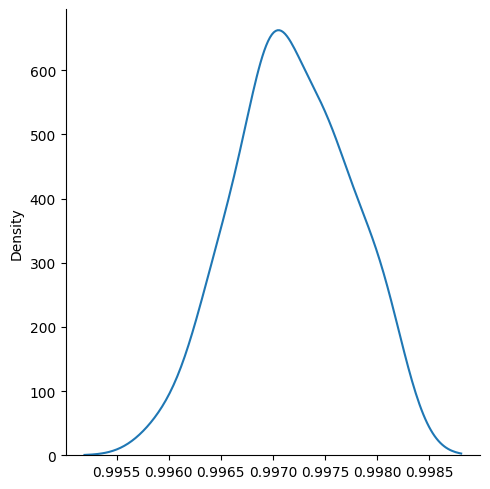

In [ ]:
sns.displot(resultado_RedeNeural, kind="kde")

# Teste de hipotese usando ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultado_arvore, resultado_RandomForest,resultado_KNN, resultado_RegrecaoLogica, resultado_SVM, resultado_RedeNeural)

In [ ]:
p

6.64338820469818e-196

In [ ]:
alpha = 0.05
if p <= alpha:
  print("hipótese nula rejeitado. Dados são diferentes")
else:
  print("hipótese alternativa rejeitada. Resultados são iguais")

hipótese nula rejeitado


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultado_arvore, resultado_RandomForest,resultado_KNN, resultado_RegrecaoLogica, resultado_SVM, resultado_RedeNeural]),
                          'algoritmo':
                           ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                           'randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest','randomForest',
                           'KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN',
                           'Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica','Lógica',
                           'SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM',
                           'Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9850,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9885,arvore
...,...,...
175,0.9980,Neural
176,0.9970,Neural
177,0.9975,Neural
178,0.9965,Neural


In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2    meandiff p-adj  lower   upper  reject
---------------------------------------------------------
   KNN       Lógica  -0.0334   0.0 -0.0357 -0.0312   True
   KNN       Neural   0.0168   0.0  0.0145   0.019   True
   KNN          SVM   0.0024 0.032  0.0001  0.0046   True
   KNN       arvore   0.0069   0.0  0.0046  0.0092   True
   KNN randomForest   0.0068   0.0  0.0046  0.0091   True
Lógica       Neural   0.0502   0.0  0.0479  0.0525   True
Lógica          SVM   0.0358   0.0  0.0335  0.0381   True
Lógica       arvore   0.0404   0.0   0.038  0.0427   True
Lógica randomForest   0.0403   0.0   0.038  0.0426   True
Neural          SVM  -0.0144   0.0 -0.0167 -0.0121   True
Neural       arvore  -0.0099   0.0 -0.0122 -0.0076   True
Neural randomForest  -0.0099   0.0 -0.0122 -0.0076   True
   SVM       arvore   0.0046   0.0  0.0023  0.0068   True
   SVM randomForest   0.0045   0.0  0.0022  0.0067   True
arvore randomF

In [ ]:
resultados.mean()

arvore           0.987367
Random Forest    0.987183
KNN              0.980200
Logistica        0.946950
SVM              0.983983
RedeNeural       0.997183
dtype: float64

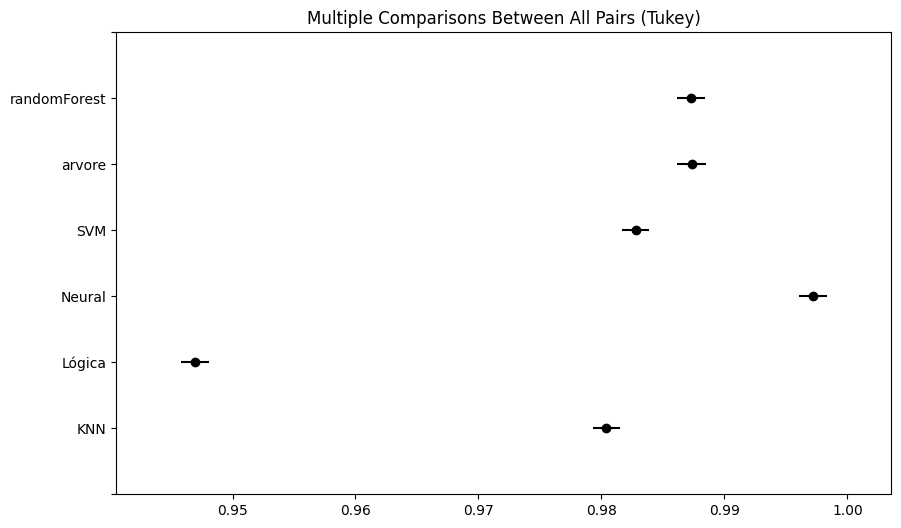

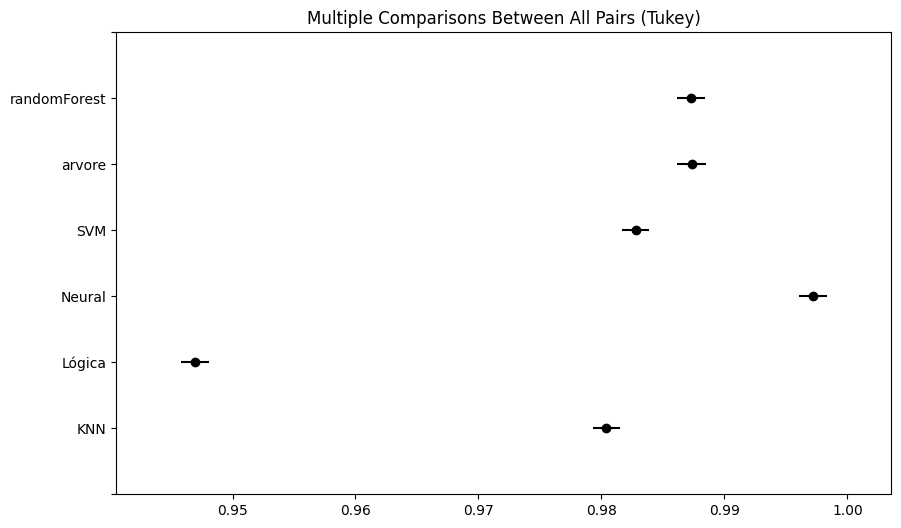

In [ ]:
teste_estatistico.plot_simultaneous()

# Salvar um classificador já treinado

In [2]:
import pickle

In [3]:
with open('credit.pkl', 'rb') as f:
  x_treinamento, y_treinamento, x_teste, y_teste = pickle.load(f)

In [4]:
import numpy as np

In [5]:
x_credit = np.concatenate((x_treinamento, x_teste),axis=0)
y_credit = np.concatenate((y_treinamento, y_teste),axis=0)

In [6]:
x_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [7]:
# Rede Neural foi classificada como a melhor mas pegaremos os 3 melhores
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
classificador_rede_neural = MLPClassifier(activation= 'relu', batch_size=56, solver= 'adam')
classificador_rede_neural.fit(x_credit, y_credit)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [ ]:
classificador_arvore = DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 5, splitter= 'best')
classificador_arvore.fit(x_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [8]:
classificador_svm = SVC(C= 1.5, kernel= 'rbf', tol= 0.001, probability=True)
classificador_svm.fit(x_credit, y_credit)

SVC(C=1.5, probability=True)

In [9]:
!pip install skops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
from skops.io import dump
dump(classificador_rede_neural, 'rede_neural_finalizada.skops')
dump(classificador_arvore, 'arvore_finalizada.skops')
dump(classificador_svm, 'svm_finalizada.skops')